Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

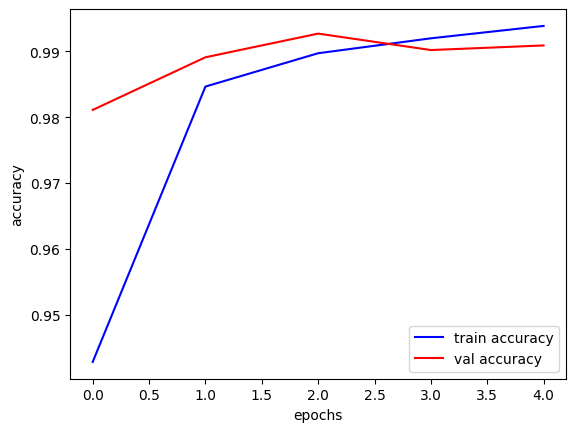

In [5]:
from keras import layers
from keras import models
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

#1
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#2: normalise images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

#3: one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train) #(60000, 10)
y_test = tf.keras.utils.to_categorical(y_test) #(10000, 10)

#4
init = tf.keras.initializers.he_uniform() # uniform은 좀 랜덤하게 찍겠다는 뜻
act = tf.keras.layers.LeakyReLU(alpha=0.3)

# 간단한 커브넷 작성
# 이미지 특징 추출 층(합성곱 기반 층)
model = models.Sequential()

#필터 수(커널의 수), 패치(커널) 사이즈(3*3), 요소별 적용할 활성화 함수, 입력 특성 맵 사이즈
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))

# activation='relu': 음수, 0은 모두 0으로 만들고, 양수 값만 남긴다
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())     # 특성공학 결과물 1차원 텐서(벡터)로 변환하는 층, 결과물을 1차원(벡터)로 변환

# 완전 연결 분류기
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))   # 출력층: 최상위층, 분류 결과물 확률 꼴로 변환

# 모델 설계 결과 요약
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#4-2: train and evalute the model
ret = model.fit(x_train, y_train, epochs=5, batch_size=64, 
                validation_data=(x_test, y_test), verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
print("train_loss: ", train_loss)
print("train_acc: ", train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: ", test_loss)
print("test_acc: ", test_acc)

#4-3: plot accuracies
plt.plot(ret.history['accuracy'],    "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'],"r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()